In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

%matplotlib inline

# EDA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


median_house_value between 14999.0 and 500001.0


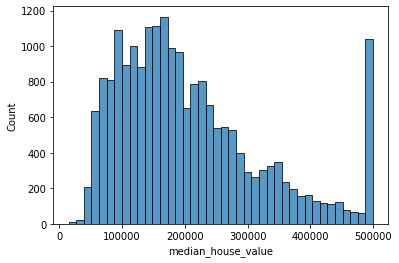

In [4]:
print(f'median_house_value between {min(df.median_house_value)} and {max(df.median_house_value)}')
sns.histplot(df.median_house_value, bins=40);

variable doesn't have very long tail

## Preparing the dataset

In [5]:
subset_cols = ['latitude',
               'longitude',
               'housing_median_age',
               'total_rooms',
               'total_bedrooms',
               'population',
               'households',
               'median_income',
               'median_house_value']

In [6]:
subset = df.loc[df.ocean_proximity.isin(['<1H OCEAN', 'INLAND']), subset_cols]
subset

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1

There's one feature with missing values. What is it?


In [7]:
subset.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Answer: total_bedrooms

### Question 2

What's the median (50% percentile) for variable 'population'?

In [8]:
subset.population.median()

1195.0

Answer: 1195.0

## Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [9]:
n = len(subset)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

print(n, n_train, n_val, n_test, n == n_train + n_val + n_test, sep='\n')

15687
9412
3137
3138
True


In [10]:
np.random.seed(42)

In [11]:
idx = np.arange(n)
np.random.shuffle(idx)

In [12]:
df_train = subset.iloc[idx[:n_train]]
df_val =  subset.iloc[idx[n_train:n_train+n_val]]
df_test = subset.iloc[idx[-n_test:]]

In [13]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [14]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [16]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [17]:
for name, fill_val in {'zero': 0, 'median': df_train.total_bedrooms.median()}.items():
    X_train = df_train.fillna(fill_val).values
    X_val = df_val.fillna(fill_val).values
    w0, w = train_linear_regression(X_train, y_train)
    y_pred_val = w0 + X_val.dot(w)
    print(f'RMSE on {name} valid:', round(rmse(y_val, y_pred_val), 2))

RMSE on zero valid: 0.34
RMSE on median valid: 0.34


Answer: Both are equally good 

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

In [18]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [19]:
X_train = df_train.fillna(0).values
X_val = df_val.fillna(0).values

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred_val = w0 + X_val.dot(w)
    print(f'RMSE with r={r} valid: {round(rmse(y_val, y_pred_val), 2)}. W0: {round(w0, 2)}')

RMSE with r=0 valid: 0.34. W0: -9.76
RMSE with r=1e-06 valid: 0.34. W0: -9.76
RMSE with r=0.0001 valid: 0.34. W0: -9.76
RMSE with r=0.001 valid: 0.34. W0: -9.74
RMSE with r=0.01 valid: 0.34. W0: -9.56
RMSE with r=0.1 valid: 0.34. W0: -8.06
RMSE with r=1 valid: 0.34. W0: -3.13
RMSE with r=5 valid: 0.35. W0: -0.84
RMSE with r=10 valid: 0.35. W0: -0.44


Answer: 0. No different with or without Regularization.

### Question 5


* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [32]:
all_rmse = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_train = subset.iloc[idx[:n_train]]
    df_val =  subset.iloc[idx[n_train:n_train+n_val]]
    df_test = subset.iloc[idx[-n_test:]]
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    X_train = df_train.fillna(0).values
    X_val = df_val.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)
    y_pred_val = w0 + X_val.dot(w)
    error = rmse(y_val, y_pred_val)
    all_rmse.append(error)
    print(f'RMSE valid with seed={seed}:', round(error, 2))
    
print(f'Std rmse:', round(np.std(all_rmse), 3))     

RMSE valid with seed=0: 0.34
RMSE valid with seed=1: 0.34
RMSE valid with seed=2: 0.34
RMSE valid with seed=3: 0.33
RMSE valid with seed=4: 0.34
RMSE valid with seed=5: 0.34
RMSE valid with seed=6: 0.34
RMSE valid with seed=7: 0.35
RMSE valid with seed=8: 0.35
RMSE valid with seed=9: 0.33
Std rmse: 0.006


Answer: 

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [27]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)
df_train = subset.iloc[idx[:n_train+n_val]]
df_test = subset.iloc[idx[-n_test:]]
y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
del df_train['median_house_value']
del df_test['median_house_value']
X_train = df_train.fillna(0).values
X_test = df_test.fillna(0).values
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred_test = w0 + X_test.dot(w)
error = rmse(y_test, y_pred_test)
print(f'RMSE test with seed=9 and r=0.001:', round(error, 2))

RMSE test with seed=9 and r=0.001: 0.33


Answer: 0.33